Problem Statement

Star Property Max is a housing agent consultant based in Ames, Iowa to help its customers to buy or sell their property. In recent years, the consultant agency has faced difficulties in helping their client in choosing their dream house as it takes a long time to close a deal. The average time taken to choose a home is 50 days according to [Housing Logic](https://www.houselogic.com/buy/first-time-home-buyer/how-long-does-it-take-buy-house/). There are several factors that determines the price of the house such as Neighborhood, Size, Age and Condition as stated by [OpenDoor](https://www.opendoor.com/w/blog/factors-that-influence-home-value)

This project aims to reduce the time taken for their client to find the right home that is within their budget by considering the factors mentioned by OpenDoor. The project will try to determine if these factors have strong effect on the saleprice of the house, so that the client can focus on these factors when doing house visit thus reducing time. 

In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")
sns.set_palette("Set1", 8, .75)
sns.set_context("talk", rc={"lines.linewidth": 2})

In [2]:
#importing the train datasets
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
#Let's look at the first 5 rows of the dataset.
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

I personally don't like columns with space and mixture of uppercase and lowercase. Therefore, let's create a function to change these.

In [5]:
def clean_column(df):
    df.columns = df.columns.str.replace(' ' , '_')
    df.columns = df.columns.str.lower()
    
    return df


In [6]:
clean_column(df_train)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [7]:
clean_column(df_test)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [8]:
df_train.shape

(2051, 81)

In [9]:
pd.options.display.max_rows = 81
df_train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

These are the columns that have null values

In [10]:
df_train.isnull().sum().sum()

9822

There are 9822 missing data in the dataframe. 

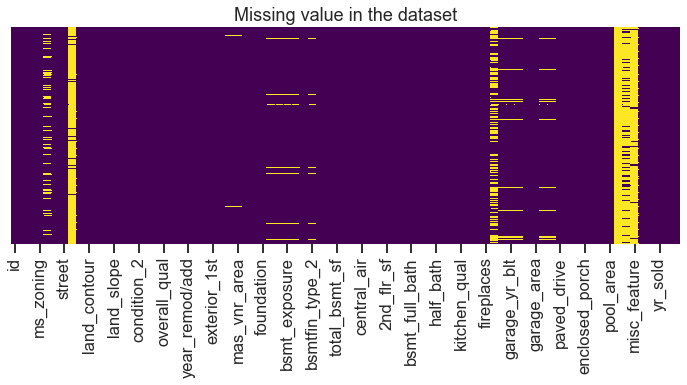

In [11]:
# Let's look at the null values in a heatmap to get an overview
plt.figure(figsize=(12,4))
sns.heatmap(df_train.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [12]:
print("Percentage of null values in 'Lot Frontage':",(330/2051)*100)
print("Percentage of null values in 'Garage Yr Blt':",(114/2051)*100)

Percentage of null values in 'Lot Frontage': 16.089712335446123
Percentage of null values in 'Garage Yr Blt': 5.558264261335934


There are at least 16% of rows that are null in 'Lot Frontage' and about 5% in 'Garage Yr Blt' column. What do we do? 

According to the Data Description, http://jse.amstat.org/v19n3/decock/DataDocumentation.txt, some of the NA data in a column could mean something else. For example, we know that there are null data in 'Fireplace Qu' column but the data NA actually means that 'NO Fireplace'. 

To counter this, we will separate the columns into different categories according to their data type. This will help in handling missing values. 

In [13]:
## Identify the different data types of each column.
df_train.dtypes.head() == 'object'

id              False
pid             False
ms_subclass     False
ms_zoning        True
lot_frontage    False
dtype: bool

In [14]:
num_vars = df_train.columns[df_train.dtypes != 'object']
cat_vars = df_train.columns[df_train.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')
Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qua

In [15]:
df_train[num_vars].isnull().sum().sort_values(ascending=False)

lot_frontage       330
garage_yr_blt      114
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
bsmtfin_sf_1         1
garage_cars          1
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
kitchen_abvgr        0
3ssn_porch           0
screen_porch         0
enclosed_porch       0
open_porch_sf        0
wood_deck_sf         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
fireplaces           0
totrms_abvgrd        0
id                   0
bedroom_abvgr        0
half_bath            0
full_bath            0
pid                  0
gr_liv_area          0
low_qual_fin_sf      0
2nd_flr_sf           0
1st_flr_sf           0
year_remod/add       0
year_built           0
overall_cond         0
overall_qual         0
lot_area             0
ms_subclass          0
saleprice            0
dtype: int64

In [16]:
df_train[num_vars].shape

(2051, 39)

In [17]:
df_train[cat_vars].shape

(2051, 42)

We know there are 39 columns for num_vars columns. 
We will impute data using SimpleImputer on 'Lot Frontage' and 'Garage Yr Blt' columns. 

We will use SimpleImputer from SKlearn to impute the missing data. 

In [18]:
df_train[num_vars].head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


Lot Frontage

In [19]:
#Let's us look at the numerical columns first. We will impute data into 'Lot Frontage' column.

from sklearn.impute import SimpleImputer

imp = SimpleImputer(add_indicator = True)
lot_frontage_impute = imp.fit_transform(df_train[['lot_frontage']])

print(lot_frontage_impute)

[[69.05520046  1.        ]
 [43.          0.        ]
 [68.          0.        ]
 ...
 [57.          0.        ]
 [80.          0.        ]
 [60.          0.        ]]


In [20]:
pd.DataFrame(lot_frontage_impute)

,0,1
0,69.0552,1.0
1,43.0000,0.0
2,68.0000,0.0
3,73.0000,0.0
4,82.0000,0.0
...,...,...
2046,79.0000,0.0
2047,69.0552,1.0
2048,57.0000,0.0
2049,80.0000,0.0


In [21]:
df_train['lot_frontage'] = pd.DataFrame(lot_frontage_impute)[0]

In [22]:
#Checking if it has been imputed.
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,69.0552,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [23]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(add_indicator = True)
garage_yr_blt_impute = imp.fit_transform(df_train[['garage_yr_blt']])

print(garage_yr_blt_impute)

[[1976.    0.]
 [1997.    0.]
 [1953.    0.]
 ...
 [1929.    0.]
 [1956.    0.]
 [1999.    0.]]


In [24]:
pd.DataFrame(garage_yr_blt_impute)

,0,1
0,1976.0,0.0
1,1997.0,0.0
2,1953.0,0.0
3,2007.0,0.0
4,1957.0,0.0
...,...,...
2046,2007.0,0.0
2047,1961.0,0.0
2048,1929.0,0.0
2049,1956.0,0.0


In [25]:
df_train['garage_yr_blt'] = pd.DataFrame(garage_yr_blt_impute)[0]

In [26]:
df_train['garage_yr_blt']

0       1976.0
1       1997.0
2       1953.0
3       2007.0
4       1957.0
         ...  
2046    2007.0
2047    1961.0
2048    1929.0
2049    1956.0
2050    1999.0
Name: garage_yr_blt, Length: 2051, dtype: float64

mas_vnr_area

In [27]:
imp = SimpleImputer(add_indicator = True)
mas_vnr_area_impute = imp.fit_transform(df_train[['mas_vnr_area']])

print(mas_vnr_area_impute)

[[289.   0.]
 [132.   0.]
 [  0.   0.]
 ...
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]]


In [28]:
pd.DataFrame(mas_vnr_area_impute)

,0,1
0,289.0,0.0
1,132.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2046,0.0,0.0
2047,0.0,0.0
2048,0.0,0.0
2049,0.0,0.0


In [29]:
df_train['mas_vnr_area'] = pd.DataFrame(mas_vnr_area_impute)[0]

In [30]:
df_train[num_vars].isnull().sum().sort_values(ascending=False)

bsmt_half_bath     2
bsmt_full_bath     2
bsmtfin_sf_1       1
garage_cars        1
garage_area        1
total_bsmt_sf      1
bsmt_unf_sf        1
bsmtfin_sf_2       1
enclosed_porch     0
open_porch_sf      0
3ssn_porch         0
bedroom_abvgr      0
screen_porch       0
pool_area          0
wood_deck_sf       0
misc_val           0
mo_sold            0
garage_yr_blt      0
yr_sold            0
fireplaces         0
totrms_abvgrd      0
kitchen_abvgr      0
id                 0
half_bath          0
full_bath          0
pid                0
gr_liv_area        0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
mas_vnr_area       0
year_remod/add     0
year_built         0
overall_cond       0
overall_qual       0
lot_area           0
lot_frontage       0
ms_subclass        0
saleprice          0
dtype: int64

#### We will set the null values of these columns to zero. 
 - bsmt_half_bath
 - bsmt_full_bath
 - bsmtfin_sf_1
 - garage_cars
 - garage_area
 - total_bsmt_sf 
 - bsmt_unf_sf 
 - bsmtfin_sf_2 

As these columns are either continuous or integer, having a zero value will represent as NA as well. 

In [31]:
num_vars_to_0 = ['bsmt_half_bath'], ['bsmt_full_bath'], ['bsmtfin_sf_1'], ['garage_cars'], ['garage_area'], ['total_bsmt_sf'], ['bsmt_unf_sf'], ['bsmtfin_sf_2']

In [32]:
for i in num_vars_to_0:
    df_train[i] = df_train[i].replace(np.nan, 0) 

In [33]:
df_train[num_vars].isnull().sum()

id                 0
pid                0
ms_subclass        0
lot_frontage       0
lot_area           0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bath     0
full_bath          0
half_bath          0
bedroom_abvgr      0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
garage_area        0
wood_deck_sf       0
open_porch_sf      0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
yr_sold            0
saleprice          0
dtype: int64

### Now let's look at the categorical columns

In [34]:
df_train[cat_vars].isnull().sum().sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
garage_finish      114
garage_cond        114
garage_qual        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmtfin_type_1      55
bsmt_qual           55
mas_vnr_type        22
paved_drive          0
functional           0
kitchen_qual         0
electrical           0
central_air          0
heating_qc           0
heating              0
ms_zoning            0
street               0
condition_2          0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
bldg_type            0
foundation           0
house_style          0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
exter_qual           0
exter_cond           0
sale_type            0
dtype: int64

According to the data description, these columns which has Null values represent something. Therefore, I will impute 'NA into these null values. 

| Null Values in Column | Description |
| -------- | --------|
| pool_qc | No Pool |
| misc_feature | None |
| alley | No Alley Access |
| fence | No fence |
| fireplace_qu | No Fireplace |
| garage_finish | No Garage|
| garage_cond | No Garage |
| garage_qual | No Garage |
| garage_type | No Garage |
| bsmt_exposure| No Basement |
| bsmtfin_type_2| No Basement |
| bsmt_cond | No Basement |
| bsmtfin_type_1 | No Basement |
| bsmt_qual | No Basement |
| mas_vnr_type | None |

In [35]:
for i in df_train.loc[:,cat_vars]:
    df_train[i] = df_train[i].replace(np.nan, 'NA') 

In [36]:
df_train.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

### Now that there are no more null values in all columns. Let's move to see the data types of each column

In [37]:
df_train[num_vars].dtypes

id                   int64
pid                  int64
ms_subclass          int64
lot_frontage       float64
lot_area             int64
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
mas_vnr_area       float64
bsmtfin_sf_1       float64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
totrms_abvgrd        int64
fireplaces           int64
garage_yr_blt      float64
garage_cars        float64
garage_area        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
misc_val             int64
mo_sold              int64
y

#### Main mission now is to change all dtypes to integer for modeling. Let's start with the object types

In [38]:
ordinal_to_int = df_train[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']]

In [39]:
##mapping the ordinal columns to bin it.
ordinal_to_int = df_train[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']]


dictionary = {'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
     #lot_shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    #utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,
    #land_slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    #bsmt_exposure
    'Av': 3,
    'Mn': 2,
    'No': 1,
    #bsmtfin_type_1, bsmtfin_type_1
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    #Electrical
    'SBrkr':1,
    'FuseA':0,
    'FuseF':0,
    'FuseP':0,
    'Mix':0,
    #Functional
    'Typ':1,
    'Min1':0,
    'Min2':0,
    'Mod':0,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0,
    #garage_finish    
    'Fin': 3,
    'RFn': 2,
    'Unf':1,
    #paved_drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
    #fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1  
}


for i in ordinal_to_int.columns:
    df_train.replace({i:dictionary},inplace=True)

In [40]:
#Let's check.
df_train[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']]

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,...,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
0,3,4,3,4,3,3,3,1,6,1,...,1,4,1,0,2,3,3,2,0,0
1,3,4,3,4,3,4,3,1,6,1,...,1,4,1,3,2,3,3,2,0,0
2,4,4,3,3,4,3,3,1,6,1,...,1,4,1,0,1,3,3,2,0,0
3,4,4,3,3,3,4,3,1,1,1,...,1,3,1,0,3,3,3,2,0,0
4,3,4,3,3,3,2,4,1,1,1,...,1,3,1,0,1,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,3,4,3,4,3,4,3,3,6,1,...,1,4,1,4,3,3,3,2,0,0
2047,3,4,3,3,3,3,3,1,4,1,...,1,3,1,0,1,3,3,2,0,0
2048,4,4,3,3,3,3,3,1,1,1,...,1,3,1,3,1,2,2,2,0,0
2049,4,4,3,3,3,3,3,1,3,2,...,1,3,1,4,1,3,3,2,0,0


In [41]:
df_train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape            int64
land_contour        object
utilities            int64
lot_config          object
land_slope           int64
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual           int64
exter_cond           int64
foundation          object
bsmt_qual            int64
bsmt_cond            int64
bsmt_exposure        int64
bsmtfin_type_1       int64
bsmtfin_sf_1       float64
bsmtfin_type_2       int64
b

In [42]:
column_to_object = df_train.dtypes == 'object'

In [43]:
column_to_object.value_counts()

False    60
True     21
dtype: int64

In [44]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,69.0552,13517,Pave,NA,3,Lvl,...,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NA,3,Lvl,...,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NA,4,Lvl,...,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NA,4,Lvl,...,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NA,3,Lvl,...,0,0,0,0,NA,0,3,2010,WD,138500


## Feature Engineering

#### We will try to find if there are any linearity of the column with sale price. We will use sns.jointplot to see the relationship, and .groupby saleprice (mean) to see the if we can group any similar feature. 
Let's start with lot_frontage

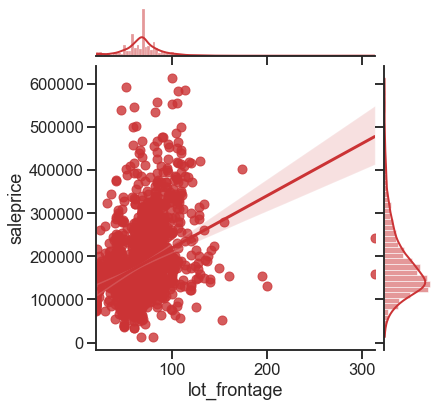

In [45]:
sns.jointplot(x=df_train['lot_frontage'],y=df_train['saleprice'],kind="reg")

This graph shows that there is a positive correlation between lot frontage and sale price therefore, we will include lot frontage as a feature on its own. 

Now, let's look at ms_zoning

In [46]:
df_train['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

From the nominal data in ms_zoning below, we need to give a dummy variable for the values. Let's look at the mean to help us give the variable. 
   
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [47]:
df_train.groupby('ms_zoning')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
ms_zoning,,
A (agr),47300.000000,2
I (all),57625.000000,1
C (all),78010.894737,19
RM,129119.142405,316
RH,148859.571429,14
RL,191235.164581,1598
FV,218618.316832,101


In [48]:
# from the mean table above, we can group them into 2 groups based on the mean saleprice.
nominal_to_int = df_train[['ms_zoning']]
dictionary = {
   'A (agr)':0,
    'I (all)':0,
    'C (all)':0,
    'RM':1,
    'RH':1,
    'RL':1,
    'FV':1,
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

In [49]:
df_train[['ms_zoning']]

,ms_zoning
0,1
1,1
2,1
3,1
4,1
...,...
2046,1
2047,1
2048,1
2049,1


In [50]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,1,69.0552,13517,Pave,NA,3,Lvl,...,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,1,43.0000,11492,Pave,NA,3,Lvl,...,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,1,68.0000,7922,Pave,NA,4,Lvl,...,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,1,73.0000,9802,Pave,NA,4,Lvl,...,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,1,82.0000,14235,Pave,NA,3,Lvl,...,0,0,0,0,NA,0,3,2010,WD,138500


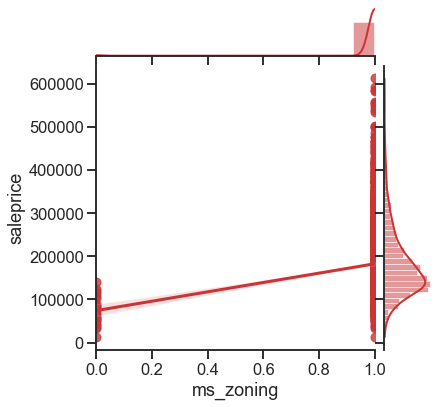

In [51]:
sns.jointplot(x=df_train['ms_zoning'],y=df_train['saleprice'],kind="reg")

In [52]:
#ms_zoning will not be in the feature. 

df_train.drop(columns = ['ms_zoning'], inplace=True)

In [53]:
df_train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape            int64
land_contour        object
utilities            int64
lot_config          object
land_slope           int64
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual           int64
exter_cond           int64
foundation          object
bsmt_qual            int64
bsmt_cond            int64
bsmt_exposure        int64
bsmtfin_type_1       int64
bsmtfin_sf_1       float64
bsmtfin_type_2       int64
bsmtfin_sf_2       float64
b

In [54]:
df_train.groupby('street')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
street,,
Grvl,86901.428571,7
Pave,181793.565558,2044


In [55]:
nominal_to_int = df_train[['street']]
dictionary = {
   'Grvl':1,
    'Pave':2
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

In [56]:
df_train[['street']]

,street
0,2
1,2
2,2
3,2
4,2
...,...
2046,2
2047,2
2048,2
2049,2


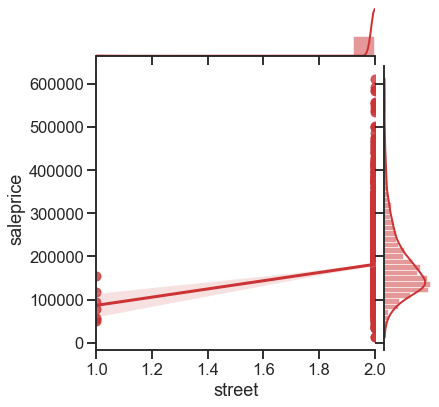

In [57]:
sns.jointplot(x=df_train['street'],y=df_train['saleprice'],kind="reg")

In [58]:
#'street' column will not be in the feature due to poor linearity

df_train.drop(columns = ['street'], inplace = True)

In [59]:
df_train.groupby('alley')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
alley,,
Grvl,120835.635294,85
Pave,174534.709091,55
NA,184366.258503,1911


In [60]:
nominal_to_int = df_train[['alley']]
dictionary = {
   'Grvl':1,
    'Pave':1,
    'NA':2
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

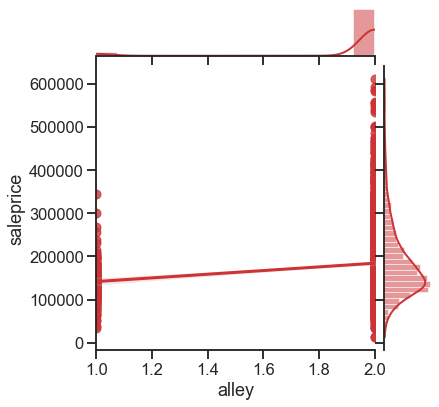

In [61]:
sns.jointplot(x=df_train['alley'],y=df_train['saleprice'],kind="reg")

In [62]:
#'alley' column will not be in the feature

df_train.drop(columns = ['alley'], inplace =True)

In [63]:
df_train.groupby('land_contour')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
land_contour,,
Bnk,142868.775000,80
Lvl,178998.564840,1843
Low,199313.116279,43
HLS,262353.376471,85


In [64]:
nominal_to_int = df_train[['land_contour']]
dictionary = {
   'Lvl':1,
    'Bnk':2,
    'HLS':2,
    'Low':3
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

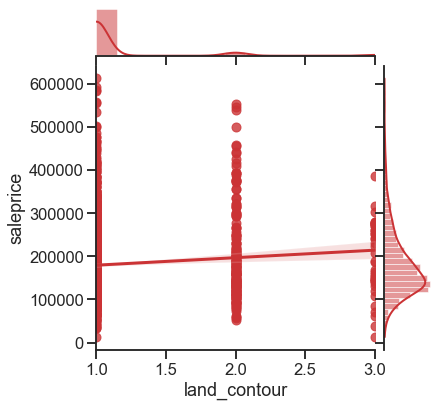

In [65]:
sns.jointplot(x=df_train['land_contour'],y=df_train['saleprice'],kind="reg")

In [66]:
#'land_contour' column will not be in the feature

df_train.drop(columns = ['land_contour'], inplace =True)

In [67]:
df_train.groupby('lot_config')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
lot_config,,
FR2,174703.600000,60
Inside,177537.014637,1503
Corner,180629.591954,348
FR3,198600.000000,9
CulDSac,230744.358779,131


In [68]:
nominal_to_int = df_train[['lot_config']]
dictionary = {
   'Inside':1,
    'Corner':2,
    'FR2':3,
    'FR3':3,
    'CulDSac':3
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

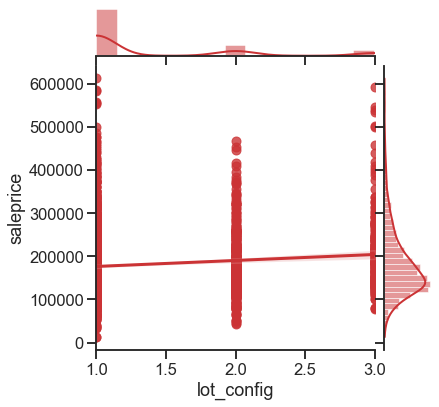

In [69]:
sns.jointplot(x=df_train['lot_config'],y=df_train['saleprice'],kind="reg")

In [70]:
#'lot_config' column will not be in the feature

df_train.drop(columns = ['lot_config'], inplace =True)

In [71]:
df_train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
lot_frontage       float64
lot_area             int64
lot_shape            int64
utilities            int64
land_slope           int64
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual           int64
exter_cond           int64
foundation          object
bsmt_qual            int64
bsmt_cond            int64
bsmt_exposure        int64
bsmtfin_type_1       int64
bsmtfin_sf_1       float64
bsmtfin_type_2       int64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
heating             object
heating_qc           int64
c

In [72]:
df_train.groupby('neighborhood')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
neighborhood,,
MeadowV,100231.250000,24
IDOTRR,101103.188406,69
BrDale,103371.052632,19
OldTown,125276.300613,163
BrkSide,127022.697368,76
Edwards,130493.468531,143
SWISU,134758.875000,32
Landmrk,137000.000000,1
Sawyer,137181.909910,111


In [73]:
nominal_to_int = df_train[['neighborhood']]
dictionary = {
   'MeadowV':1,
    'IDOTRR':1,
    'BrDale':1,
    'OldTown':1,
    'BrkSide':1,
    'Edwards':2,
    'SWISU':2,
    'Landmrk':2,
    'Sawyer':2,
    'NPkVill':2,
    'Blueste':2,
    'NAmes':2,
    'Mitchel':2,
    'SawyerW':3,
    'Greens':3,
    'Gilbert':3,
    'NWAmes':3, 
    'Blmngtn':3,
    'CollgCr':3,
    'Crawfor':3, 
    'ClearCr':3,
    'Somerst':3,
    'Timber':4,
    'Veenker':4,
    'GrnHill':4,
    'NoRidge':4,
    'NridgHt':4,
    'StoneBr':4,
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

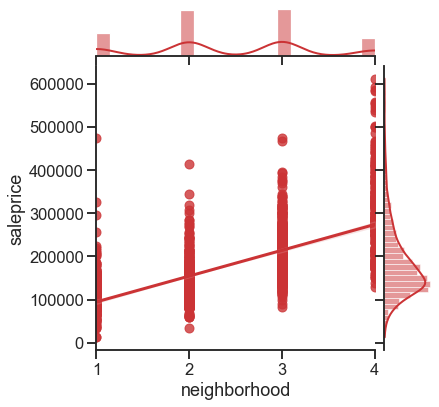

In [74]:
sns.jointplot(x=df_train['neighborhood'],y=df_train['saleprice'],kind="reg")

In [75]:
# we will include 'neighborhood' in the feature.

In [76]:
df_train.groupby('condition_1')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
condition_1,,
Artery,128765.000000,70
RRNe,129616.666667,3
RRAe,139685.714286,21
Feedr,143223.605505,109
RRAn,172604.777778,36
Norm,185007.310130,1767
RRNn,198208.333333,6
PosA,254733.333333,12
PosN,254794.296296,27


In [77]:
df_train.groupby('condition_2')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
condition_2,,
RRNn,96750.000000,2
Artery,119050.000000,5
Feedr,129181.818182,11
RRAn,136905.000000,1
Norm,181382.075556,2025
RRAe,190000.000000,1
PosA,390666.666667,3
PosN,395666.666667,3


In [78]:
nominal_to_int = df_train[['condition_1', 'condition_2']]
dictionary = {
   'Artery':0,
    'Feedr':0,
    'Norm':0,
    'RRNn':0,
    'RRAn':1,
    'PosN':1,
    'PosA':2,
    'RRNe':2,
    'RRAe':2,
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

In [79]:
df_train['condition_3'] = df_train['condition_1'] + df_train['condition_2']

In [80]:
df_train['condition_3']

0       2
1       0
2       0
3       0
4       0
       ..
2046    0
2047    0
2048    0
2049    0
2050    0
Name: condition_3, Length: 2051, dtype: int64

In [81]:
df_train.drop(columns=['condition_1','condition_2'],inplace = True)

In [82]:
df_train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,bldg_type,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,condition_3
0,109,533352170,60,69.0552,13517,3,4,3,2,1Fam,...,0,0,0,NA,0,3,2010,WD,130500,2
1,544,531379050,60,43.0000,11492,3,4,3,3,1Fam,...,0,0,0,NA,0,4,2009,WD,220000,0
2,153,535304180,20,68.0000,7922,4,4,3,2,1Fam,...,0,0,0,NA,0,1,2010,WD,109000,0
3,318,916386060,60,73.0000,9802,4,4,3,4,1Fam,...,0,0,0,NA,0,4,2010,WD,174000,0
4,255,906425045,50,82.0000,14235,3,4,3,3,1Fam,...,0,0,0,NA,0,3,2010,WD,138500,0


In [83]:
df_train.groupby('bldg_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
bldg_type,,
2fmCon,123179.891304,46
Twnhs,133100.000000,69
Duplex,139296.333333,75
1Fam,185275.685882,1700
TwnhsE,198312.372671,161


In [84]:
#I will dummify this variable as the building type intuitively may be an important feature.

df_train = pd.get_dummies(data = df_train, columns = ['bldg_type'])

In [85]:
df_train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,...,mo_sold,yr_sold,sale_type,saleprice,condition_3,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,109,533352170,60,69.0552,13517,3,4,3,2,2Story,...,3,2010,WD,130500,2,1,0,0,0,0
1,544,531379050,60,43.0000,11492,3,4,3,3,2Story,...,4,2009,WD,220000,0,1,0,0,0,0
2,153,535304180,20,68.0000,7922,4,4,3,2,1Story,...,1,2010,WD,109000,0,1,0,0,0,0
3,318,916386060,60,73.0000,9802,4,4,3,4,2Story,...,4,2010,WD,174000,0,1,0,0,0,0
4,255,906425045,50,82.0000,14235,3,4,3,3,1.5Fin,...,3,2010,WD,138500,0,1,0,0,0,0


In [86]:
df_train.dtypes

id                    int64
pid                   int64
ms_subclass           int64
lot_frontage        float64
lot_area              int64
lot_shape             int64
utilities             int64
land_slope            int64
neighborhood          int64
house_style          object
overall_qual          int64
overall_cond          int64
year_built            int64
year_remod/add        int64
roof_style           object
roof_matl            object
exterior_1st         object
exterior_2nd         object
mas_vnr_type         object
mas_vnr_area        float64
exter_qual            int64
exter_cond            int64
foundation           object
bsmt_qual             int64
bsmt_cond             int64
bsmt_exposure         int64
bsmtfin_type_1        int64
bsmtfin_sf_1        float64
bsmtfin_type_2        int64
bsmtfin_sf_2        float64
bsmt_unf_sf         float64
total_bsmt_sf       float64
heating              object
heating_qc            int64
central_air          object
electrical          

In [87]:
#I will now concentrate on the 'exterior_1' and 'exterior_2 columns'.

df_train.groupby('exterior_1st')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
exterior_1st,,
AsphShn,82375.000000,1
CBlock,93250.000000,2
AsbShng,103183.333333,33
BrkComm,131000.000000,3
Stucco,139712.962963,27
Wd Sdng,142940.887681,276
MetalSd,154402.048338,331
WdShing,155616.822222,45
HdBoard,159582.473333,300


In [88]:
df_train.groupby('exterior_2nd')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

,mean,count
exterior_2nd,,
CBlock,92000.000000,2
AsbShng,107108.928571,28
AsphShn,132125.000000,3
Brk Cmn,139958.823529,17
Stone,145420.666667,6
Wd Sdng,145654.396947,262
Stucco,147725.333333,30
Wd Shng,154244.444444,63
MetalSd,155978.635802,324


In [89]:
nominal_to_int = df_train[['exterior_1st']]
dictionary = {
   'AsphShn':0,
    'CBlock':0,
    'AsbShng':0,
    'BrkComm':0,
    'Stucco':0,
    'Wd Sdng':1,
    'MetalSd':1,
    'WdShing':1,
    'HdBoard':1,
    'Plywood':1,
    'BrkFace':1,
    'VinylSd':2,
    'CemntBd':2,
    'Stone':2, 
    'ImStucc':2, 
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

In [90]:
nominal_to_int = df_train[['exterior_2nd']]
dictionary = {
   'CBlock':0,
    'AsbShng':0,
    'AsphShn':0,
    'Brk Cmn':0,
    'Stone':1,
    'Wd Sdng':1,
    'Stucco':1,
    'Wd Shng':1,
    'MetalSd':1,
    'HdBoard':1,
    'Plywood':1,
    'BrkFace':2,
    'VinylSd':2,
    'ImStucc':2, 
    'CmentBd':2, 
        }

for i in nominal_to_int.columns:
    df_train.replace({i: dictionary},inplace = True)

In [91]:
df_train['exterior_3rd'] = df_train['exterior_1st'] + df_train['exterior_2nd']

In [92]:
df_train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,...,yr_sold,sale_type,saleprice,condition_3,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,exterior_3rd
0,109,533352170,60,69.0552,13517,3,4,3,2,2Story,...,2010,WD,130500,2,1,0,0,0,0,2
1,544,531379050,60,43.0000,11492,3,4,3,3,2Story,...,2009,WD,220000,0,1,0,0,0,0,4
2,153,535304180,20,68.0000,7922,4,4,3,2,1Story,...,2010,WD,109000,0,1,0,0,0,0,4
3,318,916386060,60,73.0000,9802,4,4,3,4,2Story,...,2010,WD,174000,0,1,0,0,0,0,4
4,255,906425045,50,82.0000,14235,3,4,3,3,1.5Fin,...,2010,WD,138500,0,1,0,0,0,0,2


In [93]:
df_train.drop(columns=['exterior_1st','exterior_2nd'],inplace = True)

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2051 non-null   int64  
 1   pid               2051 non-null   int64  
 2   ms_subclass       2051 non-null   int64  
 3   lot_frontage      2051 non-null   float64
 4   lot_area          2051 non-null   int64  
 5   lot_shape         2051 non-null   int64  
 6   utilities         2051 non-null   int64  
 7   land_slope        2051 non-null   int64  
 8   neighborhood      2051 non-null   int64  
 9   house_style       2051 non-null   object 
 10  overall_qual      2051 non-null   int64  
 11  overall_cond      2051 non-null   int64  
 12  year_built        2051 non-null   int64  
 13  year_remod/add    2051 non-null   int64  
 14  roof_style        2051 non-null   object 
 15  roof_matl         2051 non-null   object 
 16  mas_vnr_type      2051 non-null   object 


### Let's look at Outlier. 

In [95]:
#we look at the saleprice to identify for any outliers
df_train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [96]:
#Let's look at the tail end of the columns to see the outlier
df_train['saleprice'].sort_values().tail(30)

328     430000
1170    438780
1503    440000
480     441929
1647    445000
509     446261
986     450000
529     451950
934     455000
190     457347
332     460000
41      465000
1117    466500
685     468000
1158    475000
1035    475000
1700    485000
1227    500000
800     500067
81      501837
1592    535000
823     538000
138     545224
623     552000
1164    555000
151     556581
1796    582933
1692    584500
1964    591587
1671    611657
Name: saleprice, dtype: int64

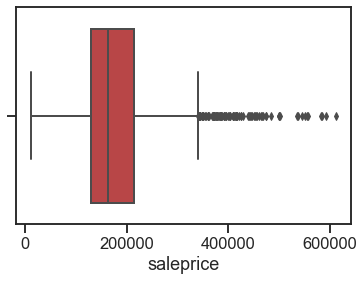

In [97]:
ax = sns.boxplot(x=df_train["saleprice"])

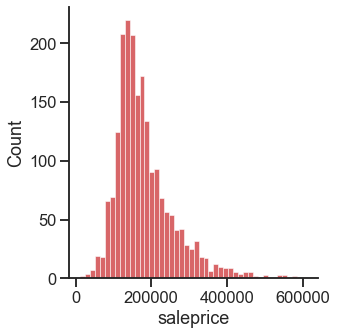

In [98]:
sns.displot(
    df_train, x="saleprice")

There are definite outliers here. Let's take the mean as the benchmark and 4 std dev from above the mean since the outliers on the boxplot seems to indicate the outliers are above the mean.

In [99]:
# this is the 4 std dev from the above the mean
181469.701609+(79258.659352*4)

498504.33901700005

In [100]:
df_train[(df_train['saleprice'] > 498504.33901700005)]

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,neighborhood,house_style,...,yr_sold,sale_type,saleprice,condition_3,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,exterior_3rd
81,367,527214050,20,63.0,17423,3,4,3,4,1Story,...,2009,New,501837,0,1,0,0,0,0,4
138,2331,527210040,60,60.0,18062,3,4,3,4,2Story,...,2006,New,545224,0,1,0,0,0,0,4
151,2333,527212030,60,85.0,16056,3,4,3,4,2Story,...,2006,New,556581,0,1,0,0,0,0,4
623,457,528176030,20,100.0,14836,3,4,0,4,1Story,...,2009,WD,552000,0,1,0,0,0,0,4
800,1702,528118050,20,59.0,17169,2,4,3,4,1Story,...,2007,New,500067,0,1,0,0,0,0,4
823,16,527216070,60,47.0,53504,2,4,0,4,2Story,...,2010,WD,538000,0,1,0,0,0,0,3
1164,424,528106020,20,105.0,15431,4,4,3,4,1Story,...,2009,WD,555000,0,1,0,0,0,0,4
1227,47,528176010,20,110.0,14300,4,4,0,4,1Story,...,2010,WD,500000,0,1,0,0,0,0,4
1592,2335,527214060,60,82.0,16052,3,4,3,4,2Story,...,2006,New,535000,0,1,0,0,0,0,4
1671,45,528150070,20,100.0,12919,3,4,3,4,1Story,...,2010,New,611657,0,1,0,0,0,0,4


In [101]:
#let's drop these rows

df_train = df_train[(df_train['saleprice'] < 498504.33901700005)]

In [102]:
df_train.shape

(2038, 78)

It seems like basement and garage related columns can be merged together accordingly. 

In [103]:
df_train['bsmt_qual_cond_merged'] = df_train['bsmt_qual'] + df_train['bsmt_cond']

In [104]:
df_train = df_train.drop(columns = ['bsmt_qual', 'bsmt_cond'])

In [105]:
df_train.shape

(2038, 77)

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2038 non-null   int64  
 1   pid                    2038 non-null   int64  
 2   ms_subclass            2038 non-null   int64  
 3   lot_frontage           2038 non-null   float64
 4   lot_area               2038 non-null   int64  
 5   lot_shape              2038 non-null   int64  
 6   utilities              2038 non-null   int64  
 7   land_slope             2038 non-null   int64  
 8   neighborhood           2038 non-null   int64  
 9   house_style            2038 non-null   object 
 10  overall_qual           2038 non-null   int64  
 11  overall_cond           2038 non-null   int64  
 12  year_built             2038 non-null   int64  
 13  year_remod/add         2038 non-null   int64  
 14  roof_style             2038 non-null   object 
 15  roof

#### Looking back at the Problem Statement, let's pick out the relevant features/ columns that will be able to answer the problem statement when we do our model. These are the features that i will include. Other features that are not in are excluded as i feel that it may not be relevant to answering the problem statement. 

In [107]:
# let's look at the columns again. 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2038 non-null   int64  
 1   pid                    2038 non-null   int64  
 2   ms_subclass            2038 non-null   int64  
 3   lot_frontage           2038 non-null   float64
 4   lot_area               2038 non-null   int64  
 5   lot_shape              2038 non-null   int64  
 6   utilities              2038 non-null   int64  
 7   land_slope             2038 non-null   int64  
 8   neighborhood           2038 non-null   int64  
 9   house_style            2038 non-null   object 
 10  overall_qual           2038 non-null   int64  
 11  overall_cond           2038 non-null   int64  
 12  year_built             2038 non-null   int64  
 13  year_remod/add         2038 non-null   int64  
 14  roof_style             2038 non-null   object 
 15  roof

In [108]:
df_train['bsmtfin_type_merged'] = df_train['bsmtfin_type_1'] + df_train['bsmtfin_type_2']

In [109]:
df_train = df_train.drop(columns = ['bsmtfin_type_1', 'bsmtfin_type_2'])

In [110]:
df_train['bsmtfin_sf_merged'] = df_train['bsmtfin_sf_1'] + df_train['bsmtfin_sf_2']

In [111]:
df_train = df_train.drop(columns = ['bsmtfin_sf_1', 'bsmtfin_sf_2'])

In [112]:
df_train.shape

(2038, 75)

In [113]:
df_train['total_bsmt_sf']

0        725.0
1        913.0
2       1057.0
3        384.0
4        676.0
         ...  
2046    1884.0
2047     861.0
2048     896.0
2049    1200.0
2050     994.0
Name: total_bsmt_sf, Length: 2038, dtype: float64

In [114]:
df_train['garage_qual_cond_merged'] = df_train['garage_qual'] + df_train['garage_cond']

In [115]:
df_train['garage_qual_cond_merged']

0       6
1       6
2       6
3       6
4       6
       ..
2046    6
2047    6
2048    4
2049    6
2050    6
Name: garage_qual_cond_merged, Length: 2038, dtype: int64

In [116]:
df_train = df_train.drop(columns = ['garage_qual', 'garage_cond'])

In [117]:
df_train.shape

(2038, 74)

In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2038 non-null   int64  
 1   pid                      2038 non-null   int64  
 2   ms_subclass              2038 non-null   int64  
 3   lot_frontage             2038 non-null   float64
 4   lot_area                 2038 non-null   int64  
 5   lot_shape                2038 non-null   int64  
 6   utilities                2038 non-null   int64  
 7   land_slope               2038 non-null   int64  
 8   neighborhood             2038 non-null   int64  
 9   house_style              2038 non-null   object 
 10  overall_qual             2038 non-null   int64  
 11  overall_cond             2038 non-null   int64  
 12  year_built               2038 non-null   int64  
 13  year_remod/add           2038 non-null   int64  
 14  roof_style              

In [119]:
# columns that i drop are the columns that will not be in my feature. 
feature1 = df_train.drop(columns =  ['id','pid', 'land_slope', 'house_style', 'year_built', 'roof_style', 'roof_matl', 'mas_vnr_type',
                                    'foundation', 'bsmt_unf_sf', 'heating', 'central_air', 'low_qual_fin_sf', 'garage_type', 
                                    'garage_yr_blt', 'garage_finish', 'paved_drive', 'wood_deck_sf','open_porch_sf',
                                    'enclosed_porch', '3ssn_porch', 'screen_porch','fence', 'misc_feature', 'misc_val',
                                    'mo_sold','sale_type'])

#feature1 = df_train[['ms_subclass', 'lot_frontage', 'lot_area', 'lot_shape', 'utilities', 'neighborhood', 'house_style',
                    'overall_quad', 'overall_cond','year_built', 'year_remod/add','mas_vnr_type', 'mas_vnr_area',
                    'exter_qual', 'exter_cond', ' bsmt_exposure', 'total_bsmt_sf', 'heating', 'heating_qc', 'electrical',
                    '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', #'half_bath',
                    'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces',
                    'fireplace_qu', 'garage_cars', 'garage_area', '', 
                    ]]

In [120]:
feature1

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,neighborhood,overall_qual,overall_cond,year_remod/add,mas_vnr_area,...,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,exterior_3rd,bsmt_qual_cond_merged,bsmtfin_type_merged,bsmtfin_sf_merged,garage_qual_cond_merged
0,60,69.0552,13517,3,4,2,6,8,2005,289.0,...,1,0,0,0,0,2,6,7,533.0,6
1,60,43.0000,11492,3,4,3,7,5,1997,132.0,...,1,0,0,0,0,4,7,7,637.0,6
2,20,68.0000,7922,4,4,2,5,7,2007,0.0,...,1,0,0,0,0,4,6,7,731.0,6
3,60,73.0000,9802,4,4,4,5,5,2007,0.0,...,1,0,0,0,0,4,7,2,0.0,6
4,50,82.0000,14235,3,4,3,6,8,1993,0.0,...,1,0,0,0,0,2,6,2,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,79.0000,11449,3,4,4,8,5,2007,0.0,...,1,0,0,0,0,4,7,7,1011.0,6
2047,30,69.0552,12342,3,4,2,4,5,1950,0.0,...,1,0,0,0,0,4,6,5,262.0,6
2048,50,57.0000,7558,4,4,3,6,6,1950,0.0,...,1,0,0,0,0,2,6,2,0.0,4
2049,20,80.0000,10400,4,4,2,4,5,1956,0.0,...,1,0,0,0,0,2,6,5,905.0,6


In [121]:
feature1.describe()

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,neighborhood,overall_qual,overall_cond,year_remod/add,mas_vnr_area,...,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,exterior_3rd,bsmt_qual_cond_merged,bsmtfin_type_merged,bsmtfin_sf_merged,garage_qual_cond_merged
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,...,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000
mean,57.127085,68.963796,9992.582434,3.599117,3.998528,2.439647,6.091757,5.565751,1984.052993,96.120859,...,0.827772,0.022571,0.036801,0.033857,0.078999,2.752699,6.409715,4.827772,484.682532,5.610402
std,42.905372,21.261635,6615.808437,0.564660,0.049522,0.921056,1.406877,1.107100,21.030500,167.535680,...,0.377671,0.148568,0.188319,0.180905,0.269803,1.049899,1.337295,2.418281,474.843706,1.423324
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,3.000000,4.000000,2.000000,5.000000,5.000000,1964.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,2.000000,0.000000,6.000000
50%,50.000000,69.055200,9378.500000,4.000000,4.000000,2.000000,6.000000,5.000000,1993.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,5.000000,453.000000,6.000000
75%,70.000000,78.000000,11452.750000,4.000000,4.000000,3.000000,7.000000,6.000000,2004.000000,150.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,7.000000,788.750000,6.000000
max,190.000000,313.000000,159000.000000,4.000000,4.000000,4.000000,10.000000,9.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,11.000000,5644.000000,10.000000


### Now that we have cleaned the data, let's save this cleaned data into a new folder.

In [122]:
feature1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2050
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ms_subclass              2038 non-null   int64  
 1   lot_frontage             2038 non-null   float64
 2   lot_area                 2038 non-null   int64  
 3   lot_shape                2038 non-null   int64  
 4   utilities                2038 non-null   int64  
 5   neighborhood             2038 non-null   int64  
 6   overall_qual             2038 non-null   int64  
 7   overall_cond             2038 non-null   int64  
 8   year_remod/add           2038 non-null   int64  
 9   mas_vnr_area             2038 non-null   float64
 10  exter_qual               2038 non-null   int64  
 11  exter_cond               2038 non-null   int64  
 12  bsmt_exposure            2038 non-null   int64  
 13  total_bsmt_sf            2038 non-null   float64
 14  heating_qc              

In [123]:
feature1.to_csv('./datasets/df_train_cleaned.csv', index = False)